In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics



df = pd.read_csv('project_final.csv', index_col=0)
# print(df)

df['genre'] = np.where(df['genre']=="classical",0,np.where(df['genre']=="reggae",1,np.where(df['genre']=="blues",2,np.where(df['genre']=="pop",3,np.where(df['genre']=="hiphop",4,5)))))

independent_variables = df.drop('genre', axis=1)
x = independent_variables.values
y = df['genre'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 500, test_size = 100, shuffle = False)

gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_train)
predicted_class = gnb.predict(x_test)

print()
# print('Actual genre ', y_train)
# print('Predicted genre ', y_pred)

print()
print(gnb)
print('Accuracy = {}'.format(metrics.accuracy_score(y_pred, y_train)))
print('Confusion = {}'.format(metrics.confusion_matrix(y_pred, y_train, [0,1,2,3,4,5])))
print()



GaussianNB(priors=None)
Accuracy = 0.634
Confusion = [[78  1 10  0  0  0]
 [ 4 43  4  9 14  0]
 [ 7 13 37  0  3  5]
 [ 0 22  0 63 25  0]
 [ 1  1  0  6 19  4]
 [ 0  4 30  0 20 77]]



In [4]:
import matplotlib.pyplot as plt
cmap=plt.cm.Blues
import seaborn as sn


		  Testing Data


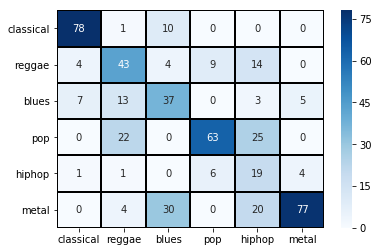

In [8]:
df_cm_test=metrics.confusion_matrix(y_pred, y_train, [0,1,2,3,4,5])
plot_labels=['classical','reggae','blues','pop','hiphop','metal']
print('\033[1m'+"\n\t\t  Testing Data")
gra=sn.heatmap(df_cm_test,cmap=cmap,linecolor="#000000",linewidth=1,annot=True,xticklabels=plot_labels,yticklabels=plot_labels)